# Assignment 2(due on 11/08)

## Student:梁纪元（12332296），Gtihub：Edc147258
## 批改人：张鹏


## 得分：48/50

### 1 Significant earthquakes since 2150 B.C.

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

file='./earthquakes-2023-11-05_11-39-06_+0800.tsv'
Year=1
Month=2
Day=3
Hour=4
Minute=5
Second=6
Location_Name=9
Magnitude=13
Deaths=15

class Eqs:
    data=[]

    def __init__(self):
        idx=0
        with open(file, encoding='utf-8') as file_obj:
            for line in file_obj:
                list = line.split('\t')

                if(idx>1):
                    self.data.append({})
                    if(list[Year]==''):
                        self.data[idx - 2]['Year']=None
                    else:
                        self.data[idx-2]['Year']=int(list[Year])
                    if (list[Month] == ''):
                        self.data[idx - 2]['Month'] = None
                    else:
                        self.data[idx - 2]['Month'] = int(list[Month])
                    if (list[Day] == ''):
                        self.data[idx - 2]['Day'] = None
                    else:
                        self.data[idx - 2]['Day'] = int(list[Day])
                    if (list[Hour] == ''):
                        self.data[idx - 2]['Hour'] = None
                    else:
                        self.data[idx - 2]['Hour'] = int(list[Hour])
                    if (list[Minute] == ''):
                        self.data[idx - 2]['Minute'] = None
                    else:
                        self.data[idx - 2]['Minute'] = int(list[Minute])
                    if (list[Second] == ''):
                        self.data[idx - 2]['Second'] = None
                    else:
                        self.data[idx - 2]['Second'] = float(list[Second])
                    if(list[Location_Name]==''):
                        self.data[idx - 2]['Location_Name']=None
                    else:
                        self.data[idx-2]['Location_Name'] = eval(list[Location_Name]).split(':')[0]
                    if(list[Magnitude]==''):
                        self.data[idx - 2]['Magnitude']=None
                    else:
                        self.data[idx - 2]['Magnitude']=float(list[Magnitude])
                    if(list[Deaths]==''):
                        self.data[idx - 2]['Deaths']=None
                    else:
                        self.data[idx - 2]['Deaths']=int(list[Deaths])
                idx += 1
    def Func_1(self):
        country={}
        for dt in self.data:
            if dt['Location_Name'] not in country:
                country[dt['Location_Name']]=0
            else:
                if(dt['Deaths']!=None):
                    country[dt['Location_Name']]+=dt['Deaths']
        st_country=sorted(country.items(),key=lambda x:x[1],reverse=True)
        for i in range(10):
            print(st_country[i])
    def Func_2(self):
        year={}
        for dt in self.data:
            if dt['Year'] not in year:
                year[dt['Year']]=0
            else:
                if(dt['Magnitude']!=None and dt['Magnitude']>6.0):
                    year[dt['Year']]+=1
        st_year=sorted(year.items(),key=lambda x:x[0])
        years=[]
        nums=[]
        for item in st_year:
            years.append(item[0])
            nums.append(item[1])
        plt.figure(figsize=(24, 8))
        plt.scatter(years, nums)
        plt.xticks(fontsize=5)
        plt.xticks(rotation=90)
        x_major_locator = MultipleLocator(50)
        y_major_locator = MultipleLocator(1)
        ax = plt.gca()
        ax.xaxis.set_major_locator(x_major_locator)
        ax.yaxis.set_major_locator(y_major_locator)
        plt.show()
    def CountEq_LargestEq(self,name):
        cnt=0
        max_idx=-1
        for idx in range(len(self.data)):
            if(self.data[idx]['Location_Name']==name):
                cnt+=1
                if(max_idx==-1 and self.data[idx]['Magnitude']!=None):
                    max_idx=idx
                else:
                    if(self.data[idx]['Magnitude']!=None and self.data[idx]['Magnitude']>self.data[max_idx]['Magnitude']):
                        max_idx=idx
        return (cnt,str(self.data[max_idx]['Year'])+' '+str(self.data[max_idx]['Month'])+' '+str(self.data[max_idx]['Day'])+' '+str(self.data[max_idx]['Hour'])+' '+str(self.data[max_idx]['Minute'])+' '+str(self.data[max_idx]['Second']))
        # print(name,cnt,end=" ")
        # if(max_idx!=-1):
        #     print(self.data[max_idx]['Year'],self.data[max_idx]['Month'],self.data[max_idx]['Day'],self.data[max_idx]['Hour'],self.data[max_idx]['Minute'],self.data[max_idx]['Second'])
    def Func_3(self):
        country = {}
        for dt in self.data:
            if dt['Location_Name'] not in country:
                country[dt['Location_Name']] = list(self.CountEq_LargestEq(dt['Location_Name']))
        st_country = sorted(country.items(), key=lambda x: x[1][0], reverse=True)
        for item in st_country:
            print(item[0],end=' ')
            print(item[1][0],item[1][1])

In [4]:
Sig_Eqs=Eqs()
Sig_Eqs.Func_1()

('CHINA', 2075045)
('TURKEY', 1092048)
('IRAN', 995406)
('ITALY', 498478)
('SYRIA', 369224)
('HAITI', 323478)
('AZERBAIJAN', 317219)
('JAPAN', 278085)
('ARMENIA', 191890)
('ISRAEL', 160120)


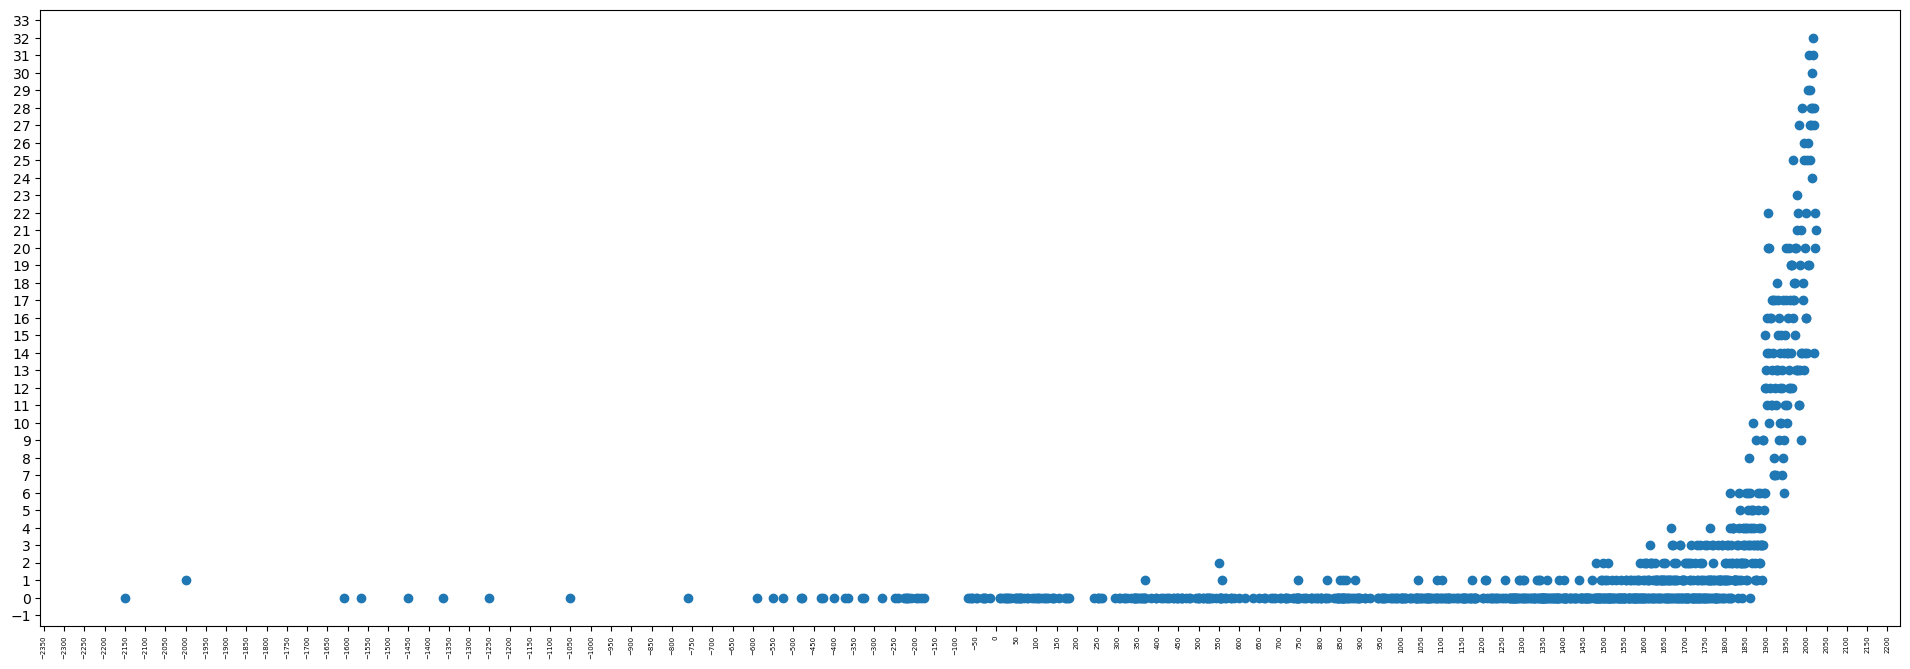

In [5]:
Sig_Eqs.Func_2()

In [6]:
Sig_Eqs.CountEq_LargestEq('CHINA')
Sig_Eqs.Func_3()

CHINA 620 1668 7 25 None None None
INDONESIA 394 2004 12 26 0 58 53.4
IRAN 384 856 12 22 None None None
JAPAN 354 2011 3 11 5 46 24.1
ITALY 330 1915 1 13 6 52 38.0
TURKEY 320 1939 12 26 23 57 23.8
GREECE 257 365 7 21 None None None
PHILIPPINES 220 1897 9 21 5 12 None
MEXICO 199 1899 1 24 23 43 0.0
CHILE 197 1960 5 22 19 11 17.0
PERU 181 1716 2 6 None None None
RUSSIA 151 1952 11 4 16 58 27.9
BALKANS NW 118 1667 4 6 7 10 None
PAPUA NEW GUINEA 103 1919 5 6 19 41 13.0
CALIFORNIA 103 1857 1 9 10 13 0.0
INDIA 98 1897 6 12 11 6 None
TAIWAN 97 1920 6 5 4 21 35.0
ALASKA 79 1964 3 28 3 36 0.0
COLOMBIA 73 1826 6 18 3 40 0.0
VENEZUELA 67 1894 4 29 2 45 0.0
ECUADOR 66 1906 1 31 15 36 10.0
NEW ZEALAND 63 1826 None None None None None
SOLOMON ISLANDS 61 1977 4 21 4 24 9.6
AFGHANISTAN 59 1909 7 7 21 37 50.0
ALGERIA 57 1980 10 10 12 25 26.0
ALBANIA 56 1893 6 14 None None None
PAKISTAN 52 1945 11 27 21 56 50.0
VANUATU ISLANDS 50 1913 10 14 8 8 48.0
FRANCE 44 1817 3 11 20 10 0.0
GUATEMALA 39 1942 8 6 23

### 第一题代码运行正常，可以输出正确结果，报告中也展示了输出内容，也针对问题给出文字分析.使用函数解决问题，且图细节更多。但第二问没有 Do you observe any trend? Explain why or why not?分析


### 得分：25+1-1/25
### --------------------------------------------------------------------------------------------

###  2. Wind speed in Shenzhen during the past 10 years

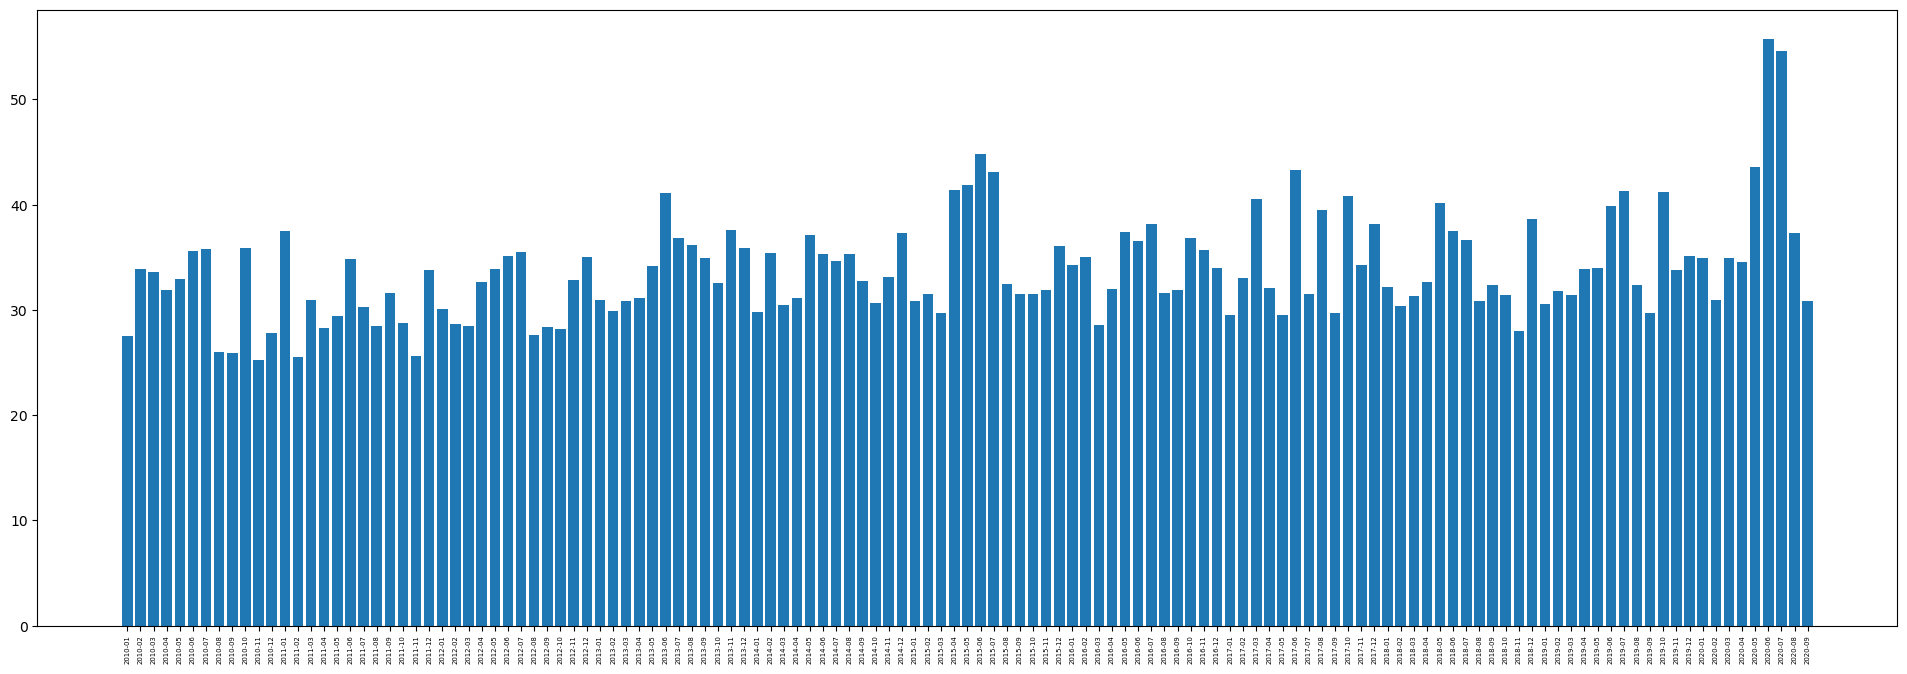

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import pandas as pd

file='./2281305.csv'

class Windspeed:
    result={}
    def __init__(self):
        data = pd.read_csv(file, sep=',',low_memory=False)

        for index,row in data.iterrows():
            lst=row['DATE'].split('-')
            date=lst[0]+'-'+lst[1]
            para=row['WND'].split(',')
            speed=int(para[3])
            if date not in self.result:
                self.result[date]=[speed,1]
            else:
                if(speed!=9999):
                    self.result[date][0]+=speed
                self.result[date][1]+=1
        self.result=sorted(self.result.items(),key=lambda x:x[0])
    def Draw(self):
        x=[]
        y=[]
        for item in self.result:
            x.append(item[0])
            y.append(item[1][0]/item[1][1])
        # plt.scatter(x, y)
        plt.figure(figsize=(24, 8))
        plt.xticks(fontsize=5)
        plt.xticks(rotation=90)
        plt.bar(x,y)

        plt.show()

ws=Windspeed()
ws.Draw()

### 第二题报告代码运行正常，可以输出正确结果。报告中展现了代码和结果，但没有对总体趋势的描述。

### 得分9/10
### ---------------------------------------------------------------------------------------------

###  3. Explore a data set

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import pandas as pd

file='./57494099999.csv'

class TEMP:
    result={}
    max_on_hour=-9999
    min_on_hour=9999
    max_on_hour_date=''
    min_on_hour_date = ''
    cnt_above250_on_hour=0
    cnt_below50_on_hour = 0
    diff_on_month=[]
    def __init__(self):
        data = pd.read_csv(file, sep=',',low_memory=False)
        for i in range(11):
            self.diff_on_month.append([-9999,9999])
        for index,row in data.iterrows():
            lst=row['DATE'].split('-')
            date=lst[0]+'-'+lst[1]
            para=row['TMP'].split(',')
            temp=int(para[0])
            if date not in self.result:
                self.result[date]=[temp,1]
            else:
                if(temp!=9999):
                    if(temp>250):
                        self.cnt_above250_on_hour+=1
                    elif(temp<50):
                        self.cnt_below50_on_hour+=1
                    if(temp>self.max_on_hour):
                        self.max_on_hour=temp
                        self.max_on_hour_date=row['DATE']
                    if(temp<self.min_on_hour):
                        self.min_on_hour=temp
                        self.min_on_hour_date=row['DATE']
                    if(temp<self.diff_on_month[int(lst[1])-1][1]):
                        self.diff_on_month[int(lst[1])-1][1]=temp
                    if (temp > self.diff_on_month[int(lst[1])-1][0]):
                        self.diff_on_month[int(lst[1])-1][0] = temp
                    self.result[date][0]+=temp
                self.result[date][1]+=1
        self.result=sorted(self.result.items(),key=lambda x:x[0])
    def Draw(self):
        x=[]
        y=[]
        for item in self.result:
            x.append(item[0])
            y.append(item[1][0]/item[1][1])
        # plt.scatter(x, y)
        plt.figure(figsize=(24, 8))
        plt.xticks(fontsize=5)
        plt.xticks(rotation=90)
        plt.bar(x,y)

        plt.show()
    def diff_per_month(self):
        for i in range(11):
            print("%d月：最低%d 最高%d" % (i+1,self.diff_on_month[i][1],self.diff_on_month[i][0]))
    def get_max(self):
        print("max:%d date:" % self.max_on_hour,self.max_on_hour_date)
    def get_min(self):
        print("min:%d date:" % self.min_on_hour,self.min_on_hour_date)
    def above(self):
        print("total %d hour above 250" % self.cnt_above250_on_hour)
    def below(self):
        print("total %d hour below 50" % self.cnt_below50_on_hour)

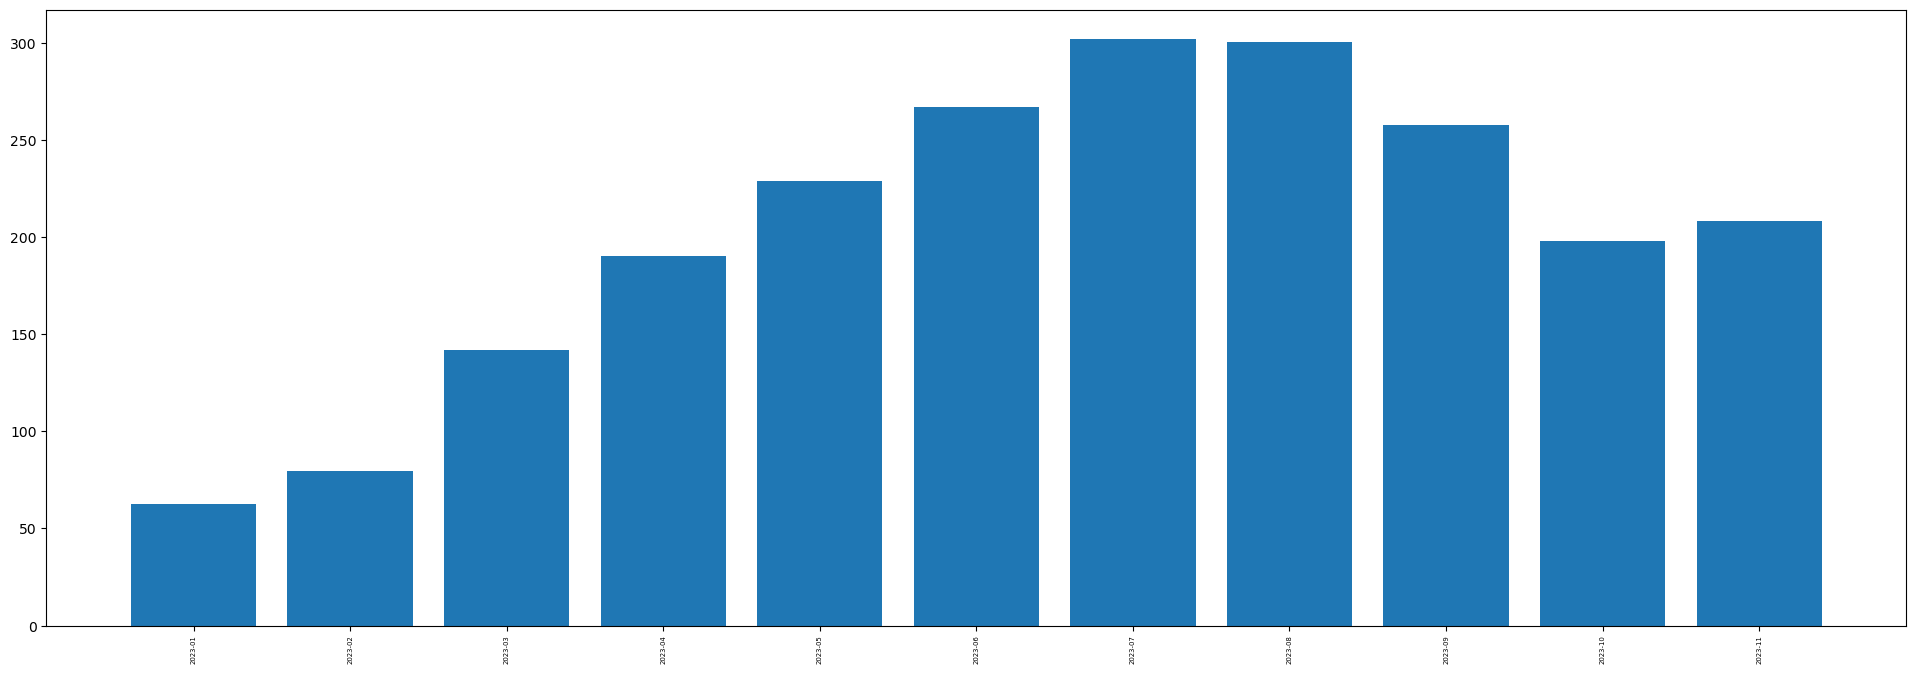

In [10]:
tp=TEMP()
tp.Draw()

In [11]:
tp.above()
tp.below()
tp.get_max()
tp.get_min()
tp.diff_per_month()

total 3271 hour above 250
total 524 hour below 50
max:390 date: 2023-08-05T08:00:00
min:-56 date: 2023-01-27T21:00:00
1月：最低-56 最高210
2月：最低-20 最高180
3月：最低27 最高260
4月：最低76 最高340
5月：最低128 最高343
6月：最低190 最高360
7月：最低230 最高380
8月：最低192 最高390
9月：最低190 最高360
10月：最低95 最高300
11月：最低138 最高291


### 第三题代码输出结果正确，也在报告中展现了输出结果但是没有呈现相应的分析 report your findings.
### 得分14/15
